# The Method

In [2]:
!pip install parfor
!pip install activeSVC==0.0.1


In [3]:
import numpy as np
import time
import random
import os

from sklearn.preprocessing import normalize 
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
from matplotlib import gridspec

from activeSVC import min_complexity, min_acquisition
import pandas as pd
import pickle

def text_create(path, name, msg):
    full_path = path + "/" + name + '.txt'
    file = open(full_path, 'w')
    file.write(str(msg))

class TimerError(Exception):
     """A custom exception used to report errors in use of Timer class"""

class Timer:
    def __init__(self):
        self._start_time = None

    def start(self):
        if self._start_time is not None:
            raise TimerError(f"Timer is running. Use .stop() to stop it")

        self._start_time = time.perf_counter()

    def stop(self):
        if self._start_time is None:
            raise TimerError(f"Timer is not running. Use .start() to start it")

        elapsed_time = time.perf_counter() - self._start_time
        self._start_time = None
        print(f"Total run time: {elapsed_time:0.4f} seconds")
        


# Download and Load Tabula Muris Data

In [4]:
import urllib.request
import shutil

with urllib.request.urlopen("https://caltech.box.com/shared/static/p2bjcw4ym5ow22yc5h2ld4d7m5wzrw8t.pickle") as response, open('./tabula.pickle', "wb") as out_file:
    shutil.copyfileobj(response, out_file)


In [5]:
import pickle
with open('tabula.pickle','rb') as handle:
    raw_data = pickle.load(handle)
    gene=np.array(pickle.load(handle))
    target=np.array(pickle.load(handle))


data=normalize(np.transpose(raw_data),axis=1, norm='l2')

del raw_data

idx = np.arange(np.shape(data)[0])
random.shuffle(idx)
X_train = data[idx[:int(np.shape(data)[0]*4/5)],:]
y_train = target[idx[:int(np.shape(data)[0]*4/5)]]
X_test = data[idx[int(np.shape(data)[0]*4/5):],:]
y_test = target[idx[int(np.shape(data)[0]*4/5):]]

print(np.shape(data),np.shape(target),len(np.unique(target)))
print(np.shape(X_train))
print(np.shape(X_test))

(55656, 8661) (55656,) 58
(44524, 8661)
(11132, 8661)


# min_complexity

## Define Parameters and Work Space

In [6]:
'''
Parameters
----------
balance : boolean
    balance the number of cells of each class or just randomly select cells at each loop
num_features : int
    the total number of genes we want to select 
num_samples : int
    the number of cells we would use at each loop
'''
balance=False
num_features = 50
num_samples=10

folder='results/min_complexity'
path=folder+'/test_'+str(num_features)+'_'+str(num_samples)

try:
    os.mkdir('results')
except OSError:
    print ("Creation of the directory %s failed" % 'results')
else:
    print ("Successfully created the directory %s " % 'results')
try:
    os.mkdir(folder)
except OSError:
    print ("Creation of the directory %s failed" % folder)
else:
    print ("Successfully created the directory %s " % folder)
try:
    os.mkdir(path)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)

Creation of the directory results failed
Creation of the directory results/min_complexity failed
Creation of the directory results/min_complexity/test_50_10 failed


## Select Genes and Save Results

feature 0 : gene 0  20 samples
training error=318.27356032701465 test error=320.4586776859504
training accuracy=0.17406342646662473 test accuracy=0.17121810995328782
Elapsed time: 17.4600 seconds
feature 1 : gene 1  30 samples
training error=326.4006827778277 test error=328.7139777218829
training accuracy=0.18659599317222172 test accuracy=0.18325547969816744
Elapsed time: 17.8333 seconds
feature 2 : gene 6873  40 samples
training error=347.7731560506693 test error=349.397772188286
training accuracy=0.21619800557002963 test accuracy=0.20831836148041682
Elapsed time: 17.8977 seconds
feature 3 : gene 5611  50 samples
training error=405.9601338603899 test error=401.89669421487605
training accuracy=0.3690369239062079 test accuracy=0.36722960833632773
Elapsed time: 17.9806 seconds
feature 4 : gene 6733  60 samples
training error=389.6384197286857 test error=391.5861480416816
training accuracy=0.3799299254334741 test accuracy=0.37639238232123606
Elapsed time: 17.2605 seconds
feature 5 : gene 

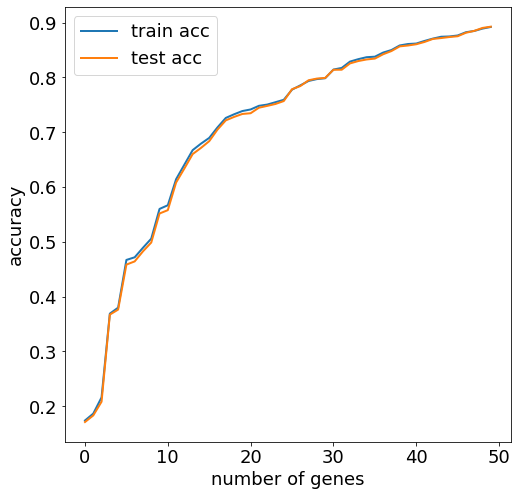

In [7]:
if __name__ == '__main__':
    t=Timer()
    t.start()
    feature_selected, num_samples_list, train_errors,test_errors,train_scores,test_scores= min_complexity(
        X_train,y_train,X_test,y_test,num_features=num_features,num_samples=num_samples,balance=balance)
    t.stop()

    text_create(path,'feature_selected',feature_selected)
    text_create(path,'error',train_errors+test_errors)
    text_create(path,'accuracy',train_scores+test_scores)
    text_create(path,'num_samples_list',num_samples_list)
    text_create(path,'genes_name',gene[feature_selected])

    plt.figure(figsize=(8,8))
    plt.plot(train_scores,linewidth=2)
    plt.plot(test_scores,linewidth=2)
    plt.legend(['train acc','test acc'],prop = {'size':18})
    plt.xlabel('number of genes',fontdict={'weight':'normal','size': 18})
    plt.ylabel('accuracy',fontdict={'weight':'normal','size': 18})
    plt.tick_params(labelsize=18)
    plt.savefig(path+'/acc.pdf', bbox_inches="tight")


# min_aquisition

## Define Parameters and Work Space

In [34]:
'''
Parameters
----------
num_features : int
    the total number of genes we want to select 
num_samples : int
    the number of cells we would use at each loop
'''
num_features = 50
num_samples=30

folder='results/min_acquisition'
path=folder+'/test_'+str(num_features)+'_'+str(num_samples)

try:
    os.mkdir('results')
except OSError:
    print ("Creation of the directory %s failed" % 'results')
else:
    print ("Successfully created the directory %s " % 'results')
try:
    os.mkdir(folder)
except OSError:
    print ("Creation of the directory %s failed" % folder)
else:
    print ("Successfully created the directory %s " % folder)
try:
    os.mkdir(path)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)

Creation of the directory results failed
Creation of the directory results/min_acquisition failed
Successfully created the directory results/min_acquisition/test_50_30 


## Select Genes and Save Results

feature 0 : gene 0  39 samples
training error=319.77724373371666 test error=314.4444843693856
training accuracy=0.17298535621237984 test accuracy=0.1755300035932447
Elapsed time: 28.5030 seconds
feature 1 : gene 1  39 samples
training error=327.95234031084357 test error=322.26616960114984
training accuracy=0.18536070433923277 test accuracy=0.18819619116061803
Elapsed time: 28.9657 seconds
feature 2 : gene 7369  46 samples
training error=414.837233851406 test error=406.73571685231764
training accuracy=0.3146392956607672 test accuracy=0.3231225296442688
Elapsed time: 33.5624 seconds
feature 3 : gene 5611  48 samples
training error=422.2951217320995 test error=415.4866151634926
training accuracy=0.33123708561674603 test accuracy=0.3403701042040963
Elapsed time: 34.7714 seconds
feature 4 : gene 881  48 samples
training error=502.11777917527627 test error=499.24784405318
training accuracy=0.3457910340490522 test accuracy=0.35348544735896514
Elapsed time: 34.4400 seconds
feature 5 : gene 773

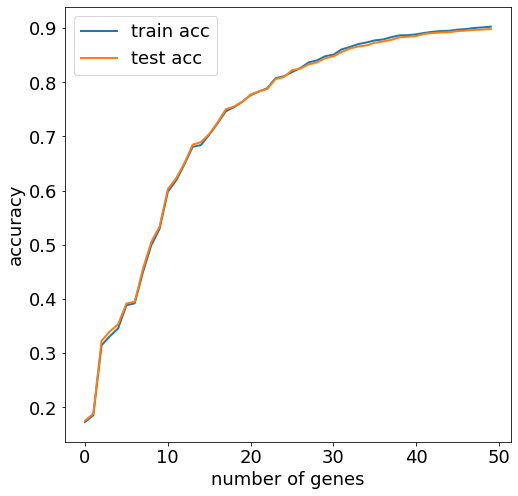

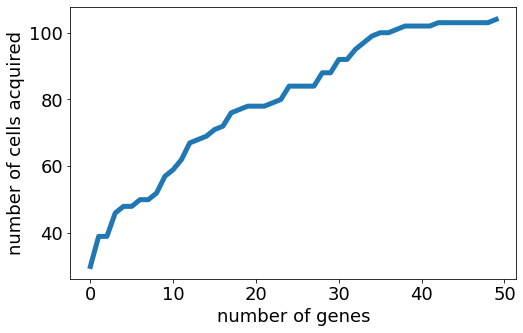

In [35]:
if __name__ == '__main__':
    t=Timer()
    t.start()
    feature_selected, num_samples_list, samples_global, train_errors,test_errors,train_scores,test_scores= min_acquisition(
        X_train,y_train,X_test,y_test,num_features=num_features,num_samples=num_samples)
    t.stop()

    text_create(path,'feature_selected',feature_selected)
    text_create(path,'error',train_errors+test_errors)
    text_create(path,'accuracy',train_scores+test_scores)
    text_create(path,'num_samples_list',num_samples_list)
    text_create(path,'samples_global',samples_global)
    text_create(path,'genes_name',gene[feature_selected])

    plt.figure(figsize=(8,8))
    plt.plot(train_scores,linewidth=2)
    plt.plot(test_scores,linewidth=2)
    plt.legend(['train acc','test acc'],prop = {'size':18})
    plt.xlabel('number of genes',fontdict={'weight':'normal','size': 18})
    plt.ylabel('accuracy',fontdict={'weight':'normal','size': 18})
    plt.tick_params(labelsize=18)
    plt.savefig(path+'/acc.pdf', bbox_inches="tight")

    plt.figure(figsize=(8,5))
    plt.plot(num_samples_list,linewidth=5)
    plt.xlabel('number of genes',fontdict={'weight':'normal','size': 18})
    plt.ylabel('number of cells acquired',fontdict={'weight':'normal','size': 18})
    plt.tick_params(labelsize=18)
    plt.savefig(path+'/cells.pdf', bbox_inches="tight")

# T-SNE of Results

In [8]:
with open('tabula.pickle','rb') as handle:
    raw_data = pickle.load(handle)
    gene=np.array(pickle.load(handle))
    target=np.array(pickle.load(handle))

data_tmp=normalize(raw_data,axis=1, norm='l2')
alpha = 100
data = np.log1p(data_tmp*alpha).toarray().transpose()

del raw_data,data_tmp

print(np.shape(data),np.shape(target),len(np.unique(target)))

(55656, 8661) (55656,) 58


## T-SNE of Original Dataset

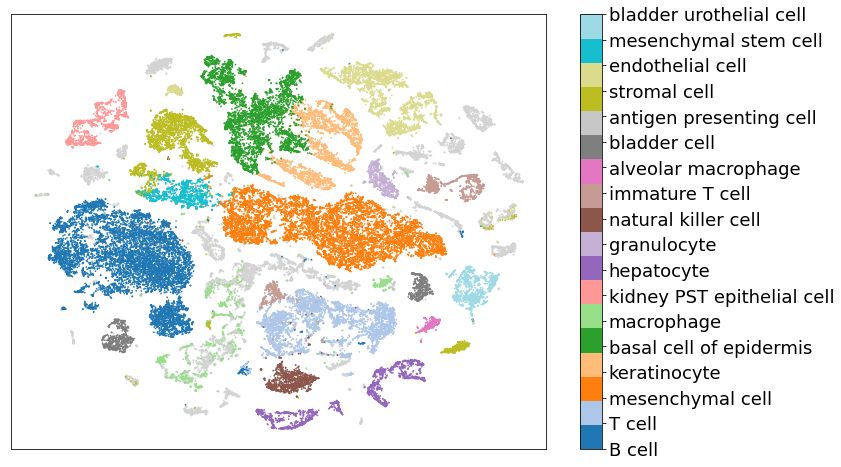

In [9]:
classes=[39,14,46,0,21,51,7,44,9,28,29,45,13,27,50,22,41,52]
keys=['B cell','T cell','mesenchymal cell','keratinocyte','basal cell of epidermis', 'macrophage','kidney PST epithelial cell', 'hepatocyte','granulocyte','natural killer cell','immature T cell','alveolar macrophage', 'bladder cell','antigen presenting cell','stromal cell','endothelial cell','mesenchymal stem cell','bladder urothelial cell']

idx=list([])
labels=target
for i in range(len(classes)):
    tmp=list(np.where(target==classes[i])[0])
    labels[tmp]=i+1
    idx =idx+ tmp
others=list(set(range(np.shape(data)[0])).difference(set(idx)))
labels[others]=-1

pca=PCA(n_components=int(X_train.shape[1]/100),
       copy=True,
       whiten=False,
       svd_solver='auto',
       tol=0.0,
       iterated_power='auto',
       random_state=None)
pcaproj=pca.fit_transform(data)
Y=TSNE(n_components=2).fit_transform(pcaproj)

plt.figure(figsize=(12,8))
c_cmap = plt.get_cmap('tab20', len(classes))
plt.scatter(Y[others,0], Y[others,1], c='lightgray', s= 0.5) # plot all cells as background
plt.scatter(Y[idx,0], Y[idx,1], c=labels[idx], s=0.5,cmap=c_cmap) # plot subpopulation cells on top
cbar=plt.colorbar(ticks=np.arange(1,len(classes)+1))
plt.xticks([])
plt.yticks([])
cbar.ax.set_yticklabels(keys,fontdict={'weight':'normal','size': 18})
plt.savefig(path+'/tsne.pdf',bbox_inches="tight")
import pickle
f=open(path+'/tsne.pickle','wb') 
pickle.dump(Y,f)
f.close()

## T-SNE with All Genes Selected

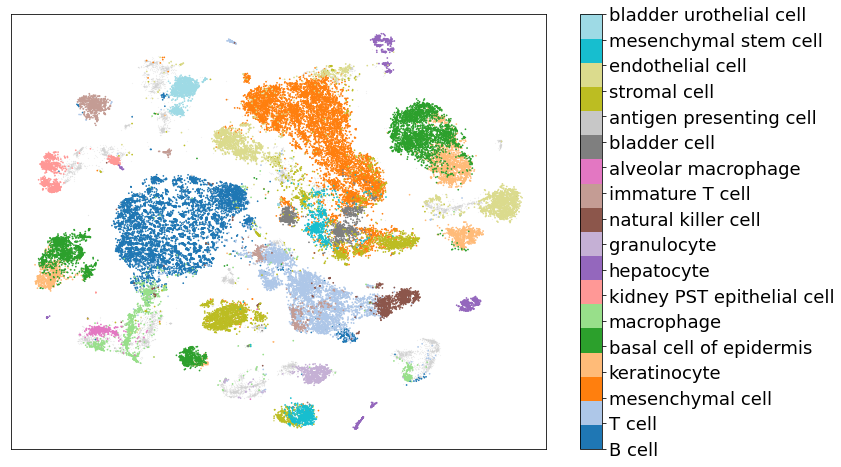

In [10]:
data_selected=data[:,feature_selected]

pca=PCA(n_components=10,
       copy=True,
       whiten=False,
       svd_solver='auto',
       tol=0.0,
       iterated_power='auto',
       random_state=None)
pcaproj=pca.fit_transform(data_selected)

Y_selected=TSNE(n_components=2,perplexity=200,early_exaggeration=1).fit_transform(pcaproj)

plt.figure(figsize=(12,8))

c_cmap = plt.get_cmap('tab20', len(classes))
plt.scatter(Y_selected[others,0], Y_selected[others,1], c='lightgray', s= 0.01) # plot all cells as background
plt.scatter(Y_selected[idx,0], Y_selected[idx,1], c=labels[idx], s=0.5,cmap=c_cmap) # plot subpopulation cells on top
cbar=plt.colorbar(ticks=np.arange(1,len(classes)+1))
plt.xticks([])
plt.yticks([])
cbar.ax.set_yticklabels(keys,fontdict={'weight':'normal','size': 18})
plt.savefig(path+'/tsne_selected_wpca.pdf',bbox_inches="tight")
import pickle
f=open(path+'/tsne_selected_wPCA.pickle','wb') 
pickle.dump(Y_selected,f)
f.close()

## T-SNE of Each Gene

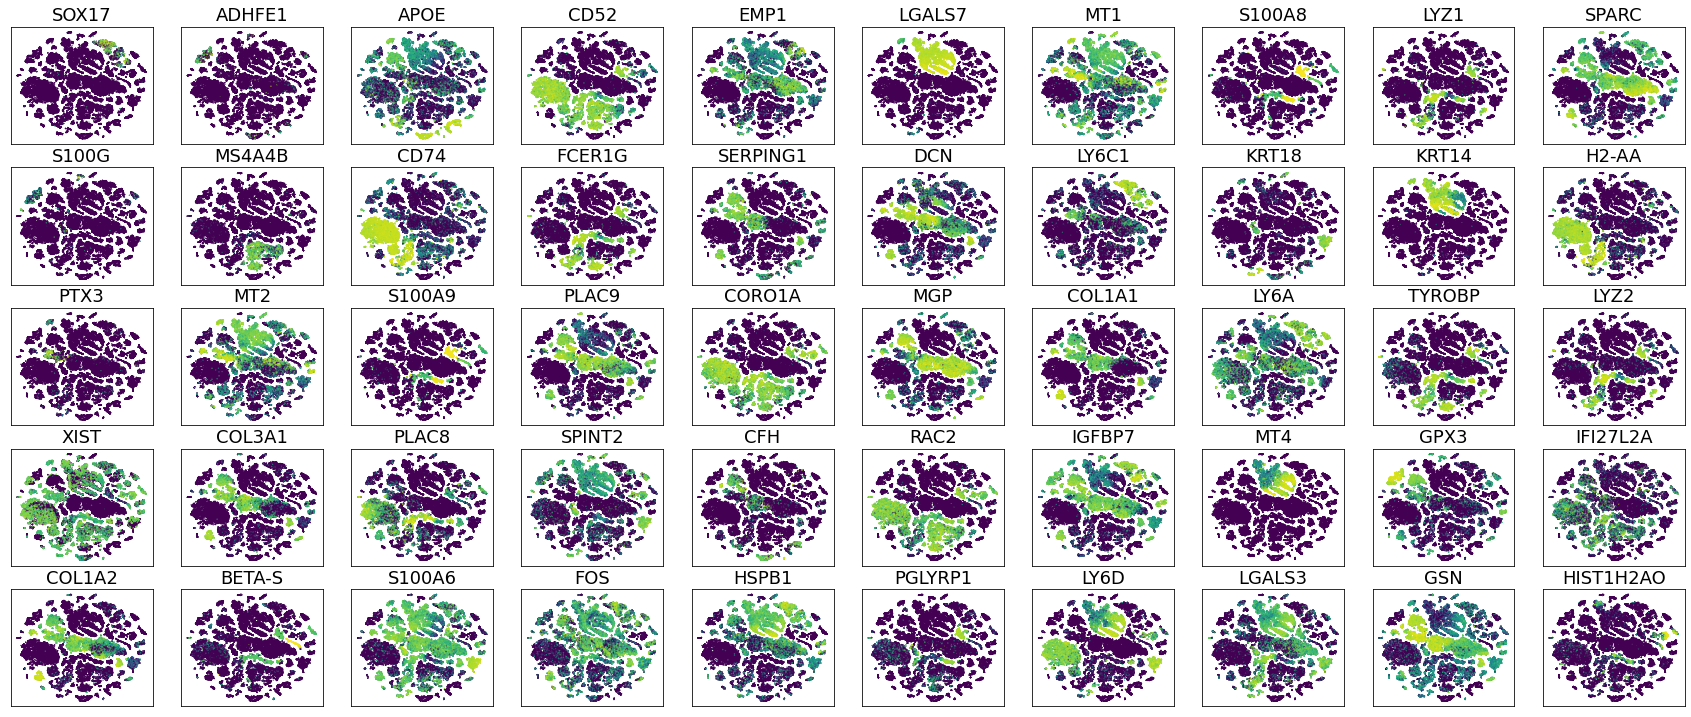

In [11]:

size=len(feature_selected)
plt.figure(figsize=(30,0.25*size))
gs = gridspec.GridSpec(int(size/10), 10, width_ratios=[7,7,7,7,7,7,7,7,7,7])

for i in range(size):
    f=feature_selected[i]
    ax0 = plt.subplot(gs[i])
    ax0.set_title(gene[f],fontdict={'weight':'normal','size': 18})
    plt.scatter(Y[:,0],Y[:,1],c=data[:,f],s=0.1)
    ax0.set_xticks([])
    ax0.set_yticks([])
plt.savefig(path+'/gene.png',dpi=300,  bbox_inches="tight")    